# Data Exploration

## Import Libraries

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the datasets

In [25]:
df = pd.read_csv("data/Popular_Baby_Names.csv")

## Overview of Dataset

In [26]:
df.head(10)

df.columns

df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57582 entries, 0 to 57581
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year of Birth       57582 non-null  int64 
 1   Gender              57582 non-null  object
 2   Ethnicity           57582 non-null  object
 3   Child's First Name  57582 non-null  object
 4   Count               57582 non-null  int64 
 5   Rank                57582 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.6+ MB


(57582, 6)

In [27]:
df.duplicated().sum()
df.loc[df.duplicated(keep=False)].sort_values("Child's First Name")

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
2746,2011,FEMALE,HISPANIC,AALIYAH,63,30
51651,2012,FEMALE,BLACK NON HISP,AALIYAH,55,10
40111,2011,FEMALE,BLACK NON HISPANIC,AALIYAH,69,5
16483,2011,FEMALE,BLACK NON HISPANIC,AALIYAH,69,5
40297,2011,FEMALE,HISPANIC,AALIYAH,63,30
...,...,...,...,...,...,...
10585,2013,FEMALE,BLACK NON HISPANIC,Zuri,16,41
19199,2013,FEMALE,BLACK NON HISPANIC,Zuri,16,41
43819,2013,FEMALE,BLACK NON HISPANIC,Zuri,16,41
35854,2014,FEMALE,BLACK NON HISPANIC,Zuri,21,30


In [28]:
# does a cell have null values
df.isna().sum()

Year of Birth         0
Gender                0
Ethnicity             0
Child's First Name    0
Count                 0
Rank                  0
dtype: int64

### While there are many duplicated pieces of data, once I get rid of them this dataset will still be worth exploring

# Data Cleaning

## Remove Duplicates

In [98]:
df = df.drop_duplicates()
df.duplicated().sum()

df.shape

0

# Exploratory Data Analysis

## Univariate

Context: https://data.cityofnewyork.us/Health/Popular-Baby-Names/25th-nujf/about_data

Shape: Scatterplot

<Axes: xlabel='Ethnicity', ylabel='Year of Birth'>

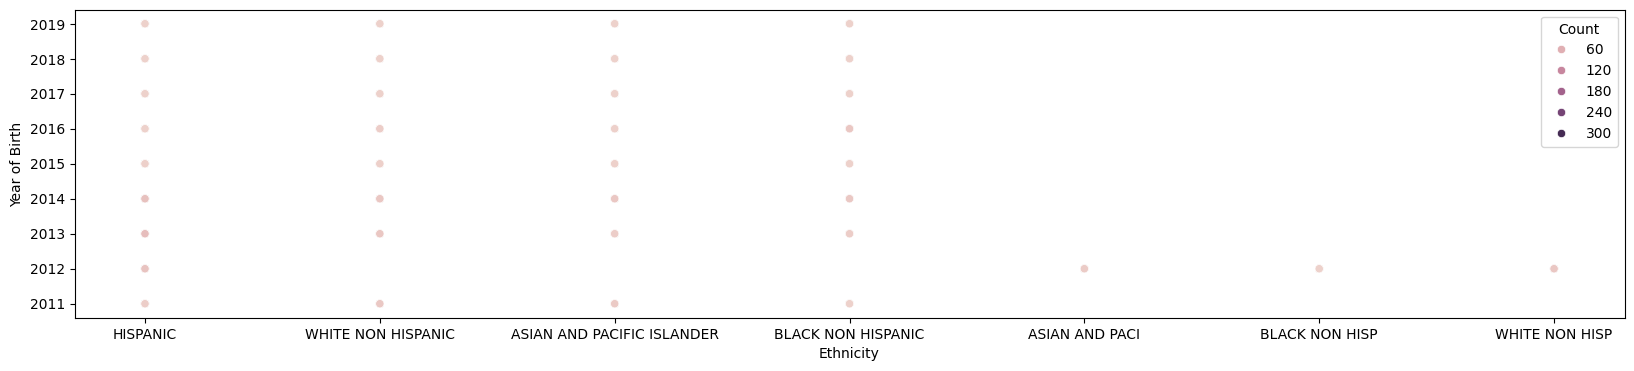

In [72]:
girls = df.query("Gender == 'FEMALE'")

plt.figure(figsize=(20,4))
sns.scatterplot(data=girls, y="Year of Birth", x="Ethnicity", hue="Count")

<Axes: xlabel='Ethnicity', ylabel='Year of Birth'>

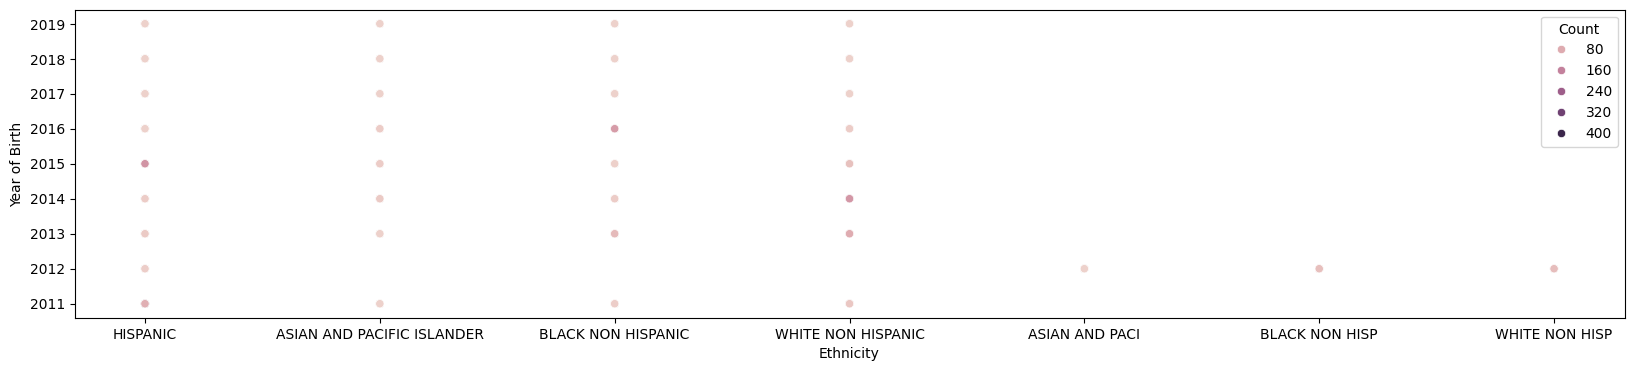

In [73]:
girls = df.query("Gender == 'MALE'")

plt.figure(figsize=(20,4))
sns.scatterplot(data=girls, y="Year of Birth", x="Ethnicity", hue="Count")

In [62]:
df["Count"].mean()


33.57358887719493

In [65]:
df["Count"].median()

20.0

In [ ]:
data = df["Count"]
data.sort_values()

In [63]:
df["Count"].max()

426

In [64]:
df["Count"].min()

10

In [66]:
df["Count"].max() - df["Count"].min()

416

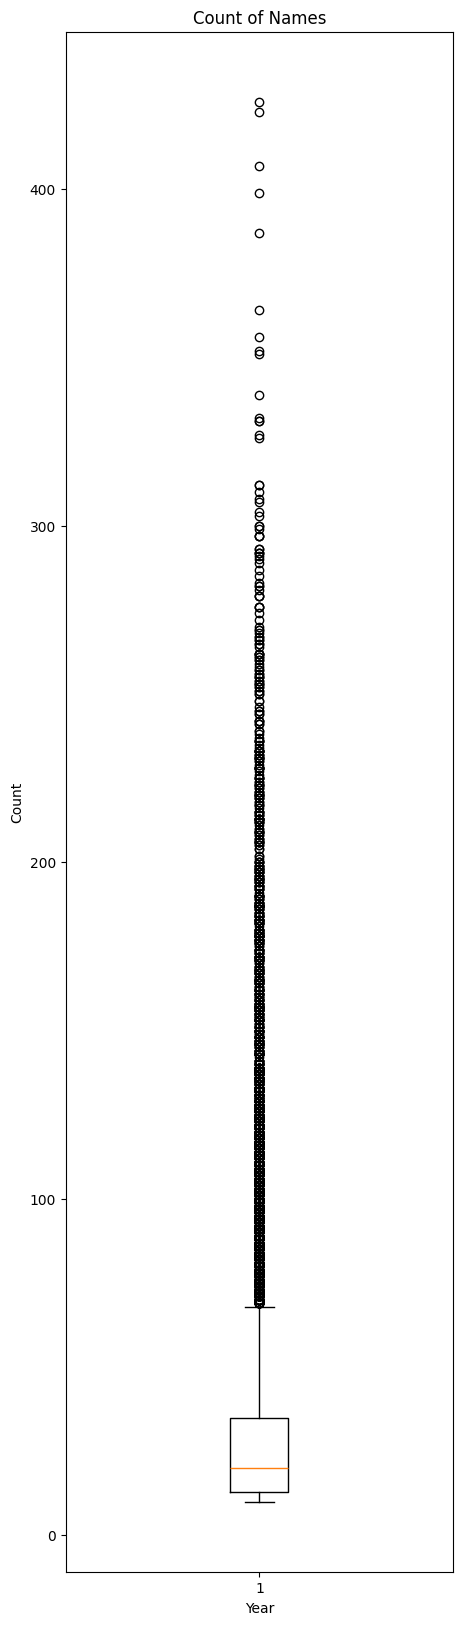

In [70]:
plt.figure(figsize=(5,20))
plt.boxplot(df["Count"])
plt.title("Count of Names")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [71]:
df["Count"].mode()

0    10
Name: Count, dtype: int64

# Statistical Analysis

What name is most common for each gender?

In [80]:
girls = df.query("Gender == 'FEMALE'")

girls.loc[girls["Count"] == girls["Count"].max()]

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
22,2011,FEMALE,HISPANIC,ISABELLA,331,1
13454,2014,FEMALE,HISPANIC,Isabella,331,1


In [81]:
boys = df.query("Gender == 'MALE'")

boys.loc[boys["Count"] == boys["Count"].max()]

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
3447,2011,MALE,HISPANIC,JAYDEN,426,1


Isabella and Jayden seem to be the most common names with both occurring in 2011.

What is the least common name for each gender?

In [82]:
girls = df.query("Gender == 'FEMALE'")

girls.loc[girls["Count"] == girls["Count"].min()]


,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
11,2011,FEMALE,HISPANIC,HAZEL,10,78
19,2011,FEMALE,HISPANIC,IRIS,10,78
21,2011,FEMALE,HISPANIC,ISABELA,10,78
36,2011,FEMALE,HISPANIC,JAYDA,10,78
42,2011,FEMALE,HISPANIC,JAYLYN,10,78
...,...,...,...,...,...,...
49507,2018,FEMALE,BLACK NON HISPANIC,Nala,10,40
49508,2018,FEMALE,BLACK NON HISPANIC,Royalty,10,40
49509,2018,FEMALE,BLACK NON HISPANIC,Sariyah,10,40
49510,2018,FEMALE,BLACK NON HISPANIC,Simone,10,40


In [85]:
boys = df.query("Gender == 'MALE'")

boys.loc[boys["Count"] == boys["Count"].min()]

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
584,2011,MALE,ASIAN AND PACIFIC ISLANDER,CODY,10,56
593,2011,MALE,ASIAN AND PACIFIC ISLANDER,EASON,10,56
607,2011,MALE,ASIAN AND PACIFIC ISLANDER,HAYDEN,10,56
612,2011,MALE,ASIAN AND PACIFIC ISLANDER,ISHAAN,10,56
645,2011,MALE,ASIAN AND PACIFIC ISLANDER,LOUIS,10,56
...,...,...,...,...,...,...
49339,2018,MALE,BLACK NON HISPANIC,Myles,10,51
49340,2018,MALE,BLACK NON HISPANIC,Quincy,10,51
49341,2018,MALE,BLACK NON HISPANIC,Sage,10,51
49342,2018,MALE,BLACK NON HISPANIC,Sean,10,51


There are many names that aren't common for both girls and boys.

What are the most common gender neutral names?

In [96]:
girls = df.query("Gender == 'FEMALE'")
boys = df.query("Gender == 'MALE'")

names = []

for girl in girls["Child's First Name"]:
    for boy in boys["Child's First Name"]:
        if boy == girl:
            names.append(boy)

names = set(names)

print(names)

# df.loc[girls["Child's First Name"] == boys["Child's First Name"]]

{'Alexis', 'ALEXIS', 'CAMERON', 'CHARLIE', 'Sage', 'Parker', 'Blake', 'Ariel', 'Quinn', 'Logan', 'Elliott', 'Jaylin', 'DYLAN', 'Peyton', 'Dylan', 'Shiloh', 'RYAN', 'Emerson', 'JIA', 'Jordan', 'PEYTON', 'Eden', 'Yael', 'ANGEL', 'Riley', 'Rowan', 'Ryan', 'Phoenix', 'KAI', 'Avery', 'Charlie', 'RILEY', 'Tenzin', 'NANA', 'Cameron', 'Milan', 'Remy', 'YAEL', 'JORDAN', 'BLAKE', 'Skyler', 'TAYLOR', 'ARIEL', 'AVERY', 'Angel', 'PARKER', 'Shea', 'Finley', 'QUINN', 'Royal', 'Jamie', 'TENZIN', 'Taylor'}


There aren't many names that are gender neutral out of the entire 18053 names